**This code is to establish linearity among different parameters and maize production**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Reading the data**

In [3]:
df = pd.read_csv('7_parameters_dataset.csv')

The five concepts involved in establishing linearity are:
1. Linear relationship: There exists a linear relationship between each predictor variable and the response variable.

2. No Multicollinearity: None of the predictor variables are highly correlated with each other.

3. Independence: The observations are independent.

4. Homoscedasticity: The residuals have constant variance at every point in the linear model.

5. Multivariate Normality: The residuals of the model are normally distributed.

**For Linear Relationship**

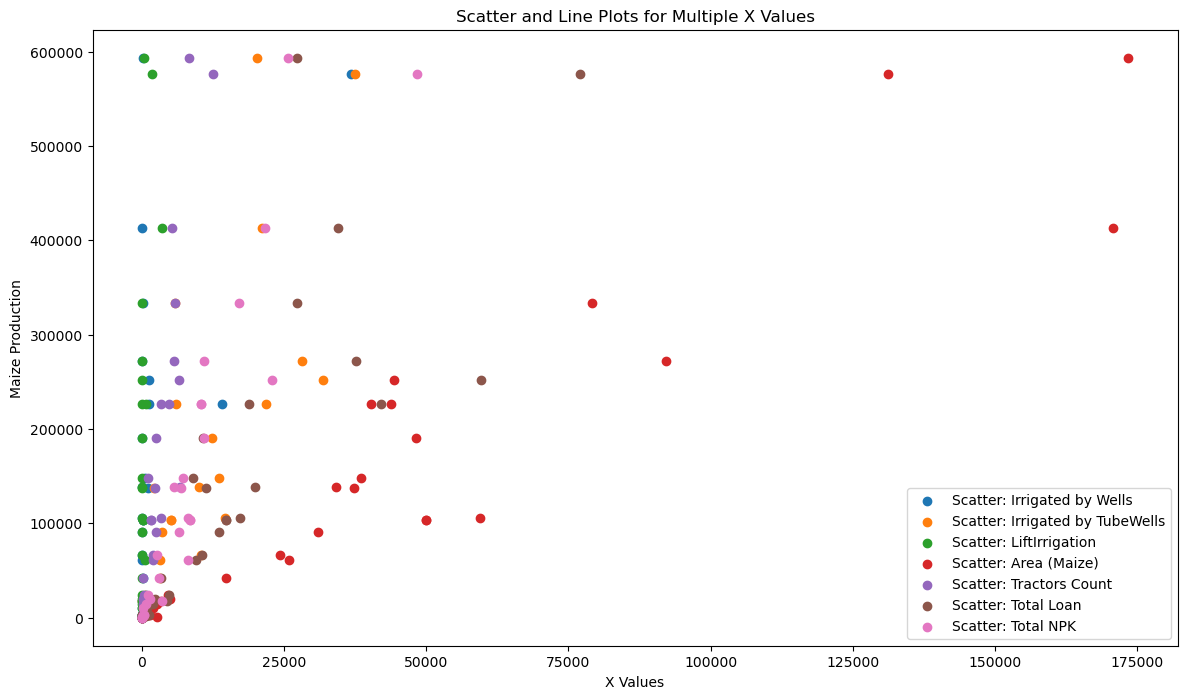

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

parameters = ['Irrigated by Wells', 'Irrigated by TubeWells',
              'LiftIrrigation', 'Area (Maize)', 'Tractors Count',
              'Total Loan', 'Total NPK']

df_values = df.drop('District', axis = 1)
df_values

for parameter, column_name in zip(parameters, df_values.columns):
    df_values.rename(columns = {column_name: parameter}, inplace = True )
df_values  

# List of x columns
x_columns = parameters
y_column = 'Maize_Production'

# Create a plot
plt.figure(figsize=(14, 8))

# Plot scatter and line for each x column
for x in x_columns:
    plt.scatter(df_values[x], df_values[y_column], label=f'Scatter: {x}')

# Adding title and labels
plt.title('Scatter and Line Plots for Multiple X Values')
plt.xlabel('X Values')
plt.ylabel('Maize Production')

# Adding legend
plt.legend()

# Show the plot
plt.show()


**This does not help in giving a clear picture, hence for each individual parameter**

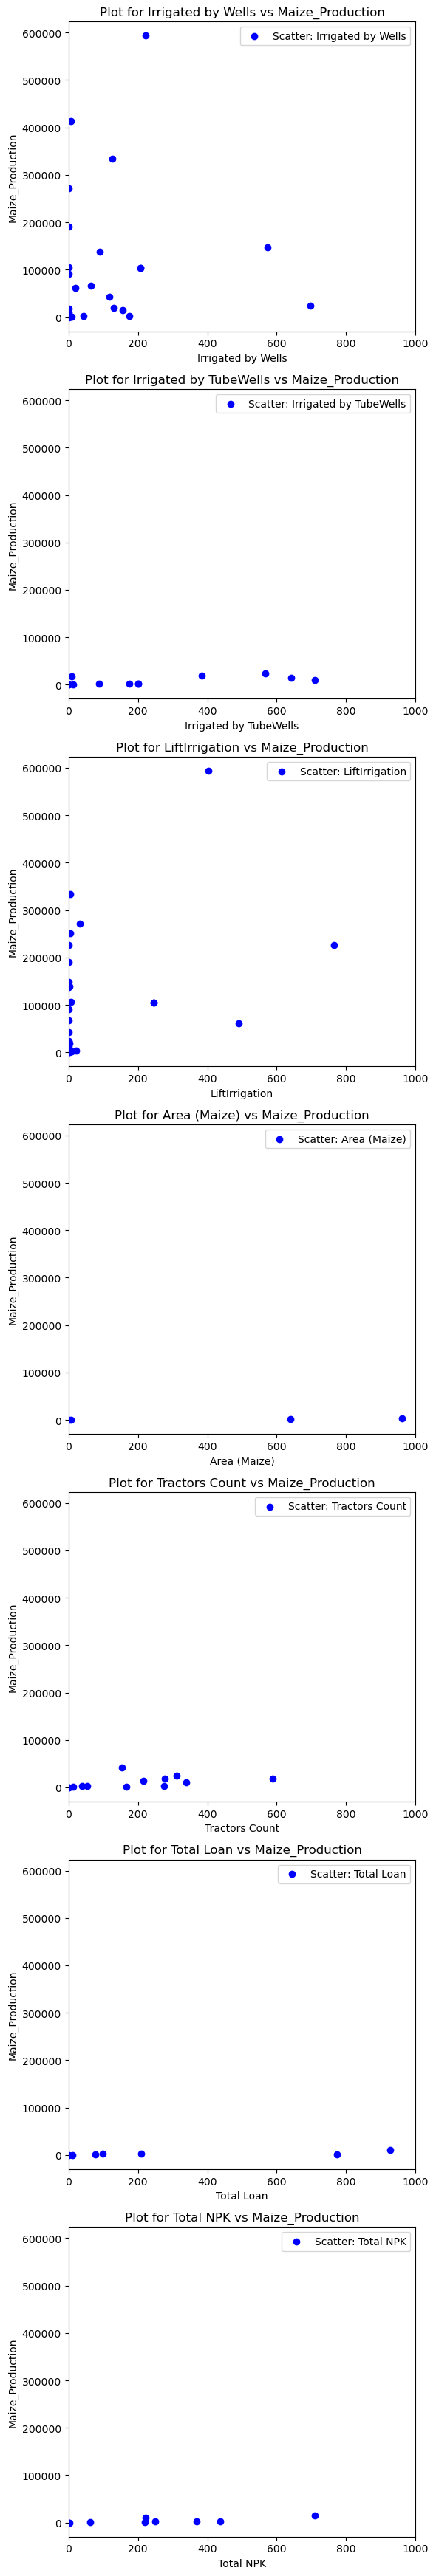

In [5]:
n = len(x_columns)

# Create subplots
fig, axs = plt.subplots(n, 1, figsize=(6, 5 * n))

# Plot each x column
for i, x in enumerate(x_columns):
    axs[i].scatter(df_values[x], df_values[y_column], label=f'Scatter: {x}', color='b')
    axs[i].set_title(f'Plot for {x} vs {y_column}')
    axs[i].set_xlabel(x)
    axs[i].set_xlim([0, 1000])
    axs[i].set_ylabel(y_column)
    axs[i].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**There is a clear spread even though there is some linearity in the plot found above**

**No Multicollinearity**

In [6]:
corr = df_values.drop('Maize_Production', axis=1).corr(method='pearson')
#.drop('residuals', axis = 1).drop('predicted', axis=1).
#.drop('Irrigated by Wells', axis=1).drop('LiftIrrigation', axis=1).drop('Area (Maize)', axis=1)
#.drop('Irrigated by TubeWells', axis = 1).drop('Irrigated by Wells', axis=1).drop('Area (Maize)', axis=1).drop('Total Loan', axis=1)
corr[ corr > 0.9 ] = 0
corr

,Irrigated by Wells,Irrigated by TubeWells,LiftIrrigation,Area (Maize),Tractors Count,Total Loan,Total NPK
Irrigated by Wells,0.000000,0.584103,0.352209,0.346496,0.629435,0.695026,0.711341
Irrigated by TubeWells,0.584103,0.000000,0.431232,0.737304,0.862590,0.000000,0.838434
LiftIrrigation,0.352209,0.431232,0.000000,0.687381,0.451851,0.461385,0.586761
Area (Maize),0.346496,0.737304,0.687381,0.000000,0.809383,0.701799,0.827175
Tractors Count,0.629435,0.862590,0.451851,0.809383,0.000000,0.000000,0.000000
Total Loan,0.695026,0.000000,0.461385,0.701799,0.000000,0.000000,0.000000
Total NPK,0.711341,0.838434,0.586761,0.827175,0.000000,0.000000,0.000000


In [7]:
import statsmodels.api as sm
features = df_values.drop('Maize_Production', axis = 1)
actual_values = df_values['Maize_Production']
train_features = sm.add_constant(features)

In [8]:
model = sm.OLS(actual_values, train_features).fit()
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['ViF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return vif_data

vif_df1 = calculate_vif(features)
                        #.drop('Irrigated by TubeWells', axis = 1).drop('Irrigated by Wells', axis=1).drop('Area (Maize)', axis=1).drop('Total Loan', axis=1))

print(vif_df1)

                 Variable        ViF
0      Irrigated by Wells   3.738266
1  Irrigated by TubeWells  16.688913
2          LiftIrrigation   3.048137
3            Area (Maize)  18.754702
4          Tractors Count  22.474283
5              Total Loan  34.763244
6               Total NPK  26.003195


Here this is a major issue, as the ViF values are comparably high, and this is the only criterion that is violated in this scenario.

In [9]:
tolerance = pd.DataFrame()
tolerance['tolerance value'] = [ 1 / value for value in vif_df1['ViF'] ]
tolerance['Variable'] = vif_df1['Variable']
tolerance

,tolerance value,Variable
0,0.267504,Irrigated by Wells
1,0.059920,Irrigated by TubeWells
2,0.328069,LiftIrrigation
3,0.053320,Area (Maize)
4,0.044495,Tractors Count
5,0.028766,Total Loan
6,0.038457,Total NPK


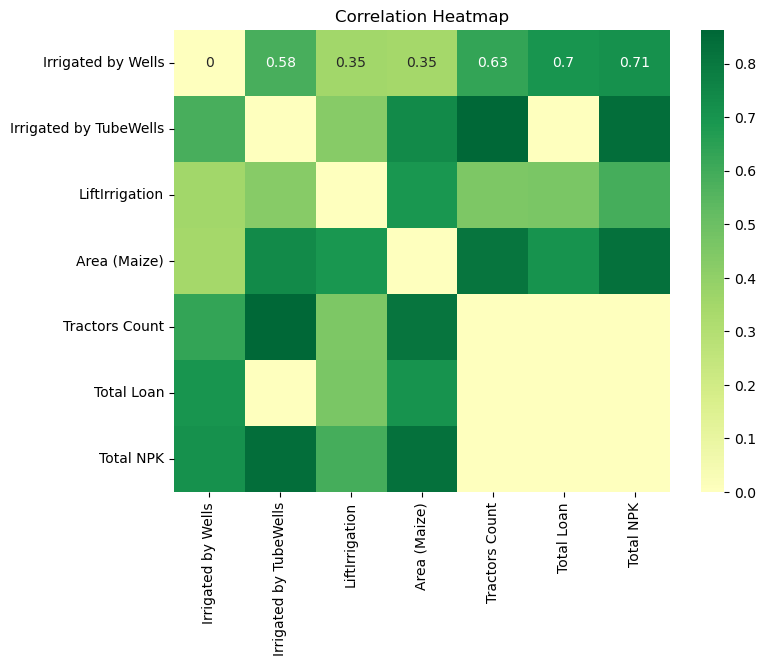

In [10]:
import seaborn as sns
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr, annot=True, cmap='RdYlGn', center=0)
#plt.xticks(rotation=45, ha='right', fontsize=12)
#plt.yticks(rotation=0, fontsize=12)
heatmap.set_title('Correlation Heatmap')
plt.show()

**Again these values are not certain, and there is high correlation between say Total Loan and Irrigated by TubeWells**

**Homoscedasticity**

This means that in linear regression, if the residuals follow a model that has a constant variance, then it follows homoscedasticity

In [11]:
import numpy as np
import pandas as pd

# Assuming train_features is your DataFrame and actual_values is your Series
X = train_features.values
y = actual_values.values

# Compute the coefficients using the normal equation
X_transpose_X = np.dot(X.T, X)
X_transpose_y = np.dot(X.T, y)
coefficients = np.linalg.solve(X_transpose_X, X_transpose_y)

# Predicted values
predicted_values = np.dot(X, coefficients)

# Create a pandas Series for predicted values
predicted_values = pd.Series(predicted_values, index=train_features.index)
print(predicted_values)

0       1986.727350
1      40824.817100
2       2981.768487
3     283801.723825
4     561073.411487
5      -1336.497864
6     186759.719179
7     151193.336842
8      71874.054834
9      95051.471849
10     -5460.015435
11     -5430.841985
12    308870.759354
13     25864.338850
14     15122.043497
15    133837.767740
16    114708.798072
17    598995.552394
18    176267.270430
19    246379.121666
20    117482.927246
21    160161.760373
22    411118.289973
23     13035.534808
24    151358.641589
25     -1290.451645
26      5631.290466
27     -1426.776842
28       603.214483
29    169033.978803
30    151373.263071
dtype: float64


Variance of Residuals: 865906201.7907672


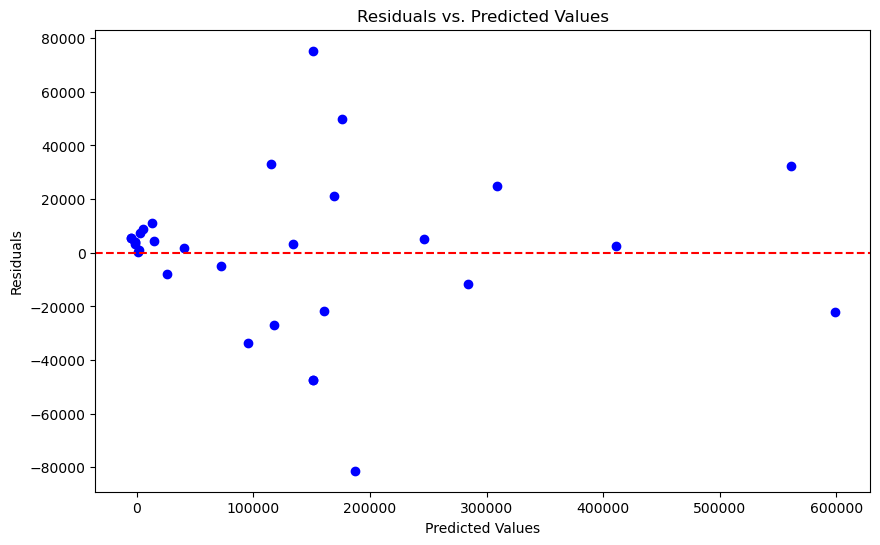

Breusch-Pagan Test
LM Statistic: 0.9270053767732991, p-value: 0.3356422869304194


In [12]:
df_values['residuals'] = actual_values - predicted_values 
df_values['predicted'] = predicted_values
# Compute the variance of residuals
variance_residuals = np.var(df_values['residuals'], ddof=1)  # ddof=1 for sample variance

print("Variance of Residuals:", variance_residuals)

# Plot Residuals vs. Predicted Values to check for homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, df_values['residuals'], color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Optional: Breusch-Pagan test for homoscedasticity
# Adding a constant to the model
X = sm.add_constant(df_values['predicted'])
results = sm.OLS(df_values['residuals'], X).fit()
test_results = sm.stats.diagnostic.het_breuschpagan(results.resid, X)

print("Breusch-Pagan Test")
print(f"LM Statistic: {test_results[0]}, p-value: {test_results[1]}")


**From this test we find the p-values is greater that 0.05, which establishes Homoscedasticity**

**Multivariate Normality**

D:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


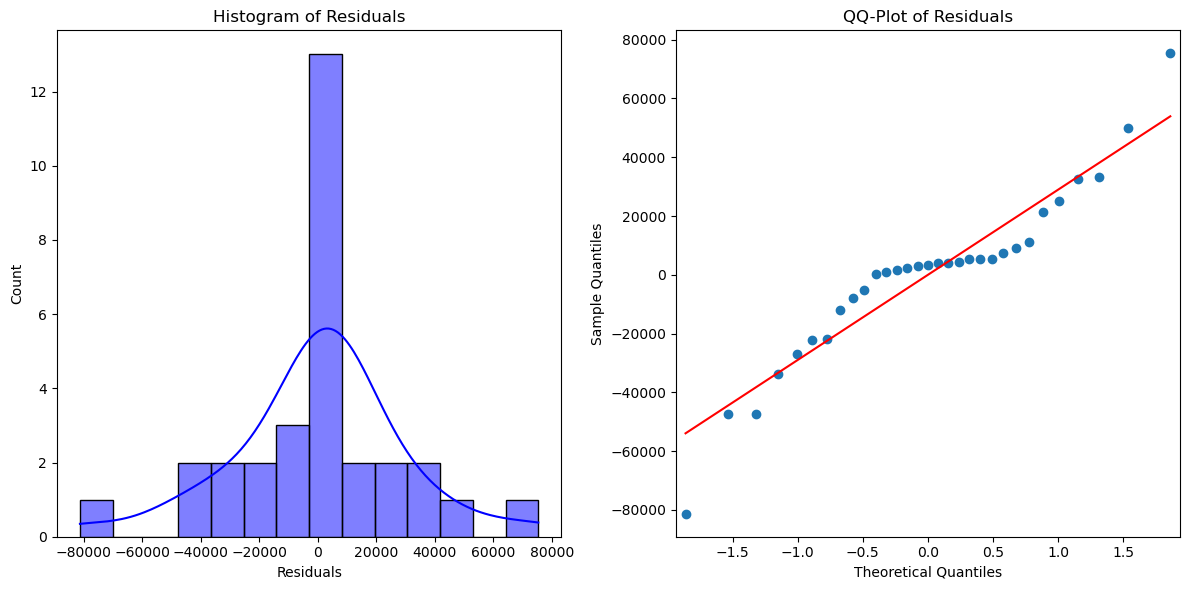

Shapiro-Wilk Test
Statistic: 0.9350976943969727, p-value: 0.06044387072324753
Skewness: -0.24804762832086655, Kurtosis: 1.9644756788486735
Jarque-Bera Test
Statistic: 3.094297102736068, p-value: 0.2128540517106693


In [13]:
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import jarque_bera

# 1. Histogram and QQ-Plot for residuals
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_values['residuals'], kde=True, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')

# QQ-Plot
plt.subplot(1, 2, 2)
qqplot(df_values['residuals'], line='s', ax=plt.gca())
plt.title('QQ-Plot of Residuals')

plt.tight_layout()
plt.show()

# 2. Shapiro-Wilk Test
shapiro_test = stats.shapiro(df_values['residuals'])
print("Shapiro-Wilk Test")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 3. Skewness and Kurtosis
skewness = df_values['residuals'].skew()
kurtosis = df_values['residuals'].kurtosis()
print(f'Skewness: {skewness}, Kurtosis: {kurtosis}')

# 4. Jarque-Bera Test
jb_test = jarque_bera(df_values['residuals'])
print("Jarque-Bera Test")
print(f"Statistic: {jb_test[0]}, p-value: {jb_test[1]}")

**Again we can see that it passes both Shapiro-Wilk test, as p-value is greater than 0.05, and Jarque-Bera test, as again p-value is greater that 0.05
, but the Skewness and Kurtosis is high enough**

**After checking for 7 parameters, we now have added 4 new parameters, and tried to remove the highly correlated rows, and check whether the conditions are satisfied or not** 

In [14]:
df = pd.read_csv('11_parameters_dataset.csv')

In [15]:
#This is for using dataset with 11 parameters, including
df_values = df
df_values = df_values.drop('Unnamed: 0', axis=1)
df_values

,Irrigated by Wells,Irrigated by TubeWells,LiftIrrigation,Area (Maize),Tractors Count,Total Loan,Total NPK,Maize_Production,Sowing Seeds,Medium Landholdings,Institutions Area,Small Landholdings
0,0.000000,175.723235,0.000000,1129.0,275.164389,98.025105,438.180210,2879,0.083651,353.645829,2.124168,375.019098
1,116.814760,3197.193185,0.157645,14867.0,154.649500,3429.301433,3036.080250,42583,21.239477,5431.492233,0.788224,6715.824015
2,0.000000,709.859804,0.118964,1987.0,339.256359,928.035816,222.225258,10450,7.737139,1262.508325,1.189643,1674.213925
3,0.000000,28105.507253,32.509127,92194.0,5647.169517,37647.333954,10902.406571,271975,1520.333365,48239.898165,135.809156,38764.247286
4,221.834115,20213.730878,402.912659,173400.0,8341.220655,27344.833540,25702.835480,593544,1579.820021,31387.979533,262.073791,30215.096139
5,0.000000,200.386108,0.000000,640.0,167.701482,772.943145,220.782906,1759,0.512407,573.090339,1.034764,676.318038
6,0.000000,14559.991862,6.070277,59377.0,3298.472645,17213.260595,8196.896749,105491,1022.740425,15565.345280,78.913595,18158.509604
7,1178.978184,5958.813645,764.862097,43827.0,3305.007438,18792.926996,10428.246256,226532,702.600996,11842.467431,38.685222,14137.237938
8,64.863914,10417.677296,0.647919,24207.0,1910.209867,10614.829758,2746.313635,66868,118.054483,13853.376989,9.934761,11514.244594
9,20.792453,3145.789961,489.764426,25831.0,1908.819293,9537.739741,8156.290370,61353,351.403272,8556.995792,88.097503,9268.265945


In [16]:
#parameters = ['Irrigated by Wells', 'Irrigated by TubeWells',
#              'LiftIrrigation', 'Area (Maize)', 'Tractors Count',
#              'Total Loan', 'Total NPK']

#df_values = df.drop('District', axis = 1)
#df_values

#for parameter, column_name in zip(parameters, df_values.columns):
#    df_values.rename(columns = {column_name: parameter}, inplace = True )
#df_values  
x_columns = ['Irrigated by Wells', 'Irrigated by TubeWells',
              'LiftIrrigation', 'Area (Maize)', 'Tractors Count',
              'Total Loan', 'Total NPK', 'Sowing Seeds', 'Medium Landholdings', 'Institutions Area', 'Small Landholdings']

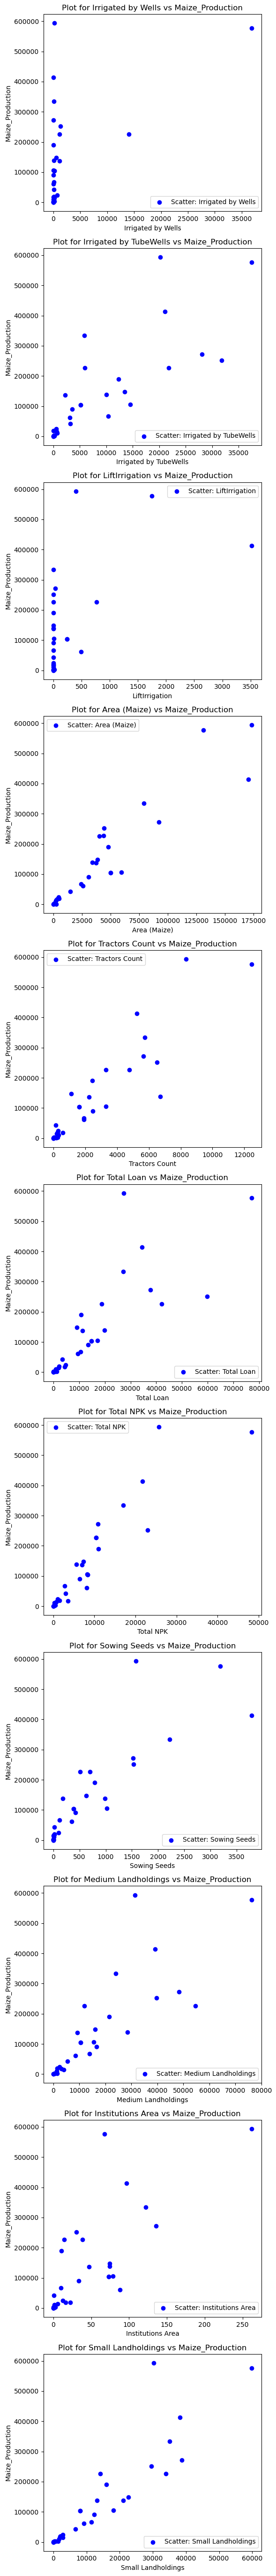

In [17]:
n = len(x_columns)

# Create subplots
fig, axs = plt.subplots(n, 1, figsize=(6, 5 * n))

# Plot each x column
for i, x in enumerate(x_columns):
    axs[i].scatter(df_values[x], df_values[y_column], label=f'Scatter: {x}', color='b')
    axs[i].set_title(f'Plot for {x} vs {y_column}')
    axs[i].set_xlabel(x)
    #axs[i].set_xlim([0, 1000])
    axs[i].set_ylabel(y_column)
    axs[i].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [18]:
#df_values = df_values.drop('Total Loan', axis=1).drop('Irrigated by TubeWells', axis=1).drop('Total NPK', axis=1)


In [19]:
corr = df_values.corr(method='pearson')
corr

,Irrigated by Wells,Irrigated by TubeWells,LiftIrrigation,Area (Maize),Tractors Count,Total Loan,Total NPK,Maize_Production,Sowing Seeds,Medium Landholdings,Institutions Area,Small Landholdings
Irrigated by Wells,1.000000,0.584103,0.352209,0.346496,0.629435,0.695026,0.711341,0.524412,0.455942,0.702028,0.034862,0.620669
Irrigated by TubeWells,0.584103,1.000000,0.431232,0.737304,0.862590,0.931092,0.838434,0.809831,0.769217,0.940020,0.487916,0.910572
LiftIrrigation,0.352209,0.431232,1.000000,0.687381,0.451851,0.461385,0.586761,0.572754,0.772126,0.463448,0.285975,0.518065
Area (Maize),0.346496,0.737304,0.687381,1.000000,0.809383,0.701799,0.827175,0.938662,0.886626,0.737593,0.818600,0.827650
Tractors Count,0.629435,0.862590,0.451851,0.809383,1.000000,0.914843,0.917063,0.915528,0.831795,0.912696,0.643802,0.927030
Total Loan,0.695026,0.931092,0.461385,0.701799,0.914843,1.000000,0.904839,0.823037,0.797689,0.948962,0.438283,0.921144
Total NPK,0.711341,0.838434,0.586761,0.827175,0.917063,0.904839,1.000000,0.923545,0.858809,0.855108,0.568822,0.889081
Maize_Production,0.524412,0.809831,0.572754,0.938662,0.915528,0.823037,0.923545,1.000000,0.869802,0.836805,0.751439,0.904365
Sowing Seeds,0.455942,0.769217,0.772126,0.886626,0.831795,0.797689,0.858809,0.869802,1.000000,0.793557,0.587159,0.885124
Medium Landholdings,0.702028,0.940020,0.463448,0.737593,0.912696,0.948962,0.855108,0.836805,0.793557,1.000000,0.471475,0.959004


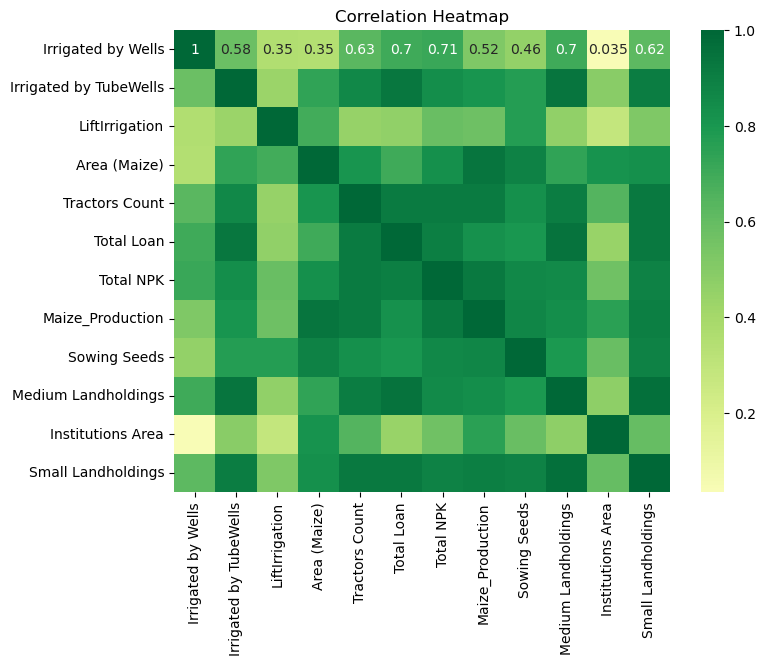

In [20]:
import seaborn as sns
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr, annot=True, cmap='RdYlGn', center=0)
#plt.xticks(rotation=45, ha='right', fontsize=12)
#plt.yticks(rotation=0, fontsize=12)
heatmap.set_title('Correlation Heatmap')
plt.show()

In [21]:
import statsmodels.api as sm
features = df_values.drop('Maize_Production', axis = 1)
actual_values = df_values['Maize_Production']
train_features = sm.add_constant(features)

In [22]:
import numpy as np
import pandas as pd

# Assuming train_features is your DataFrame and actual_values is your Series
X = train_features.values
y = actual_values.values

# Compute the coefficients using the normal equation
X_transpose_X = np.dot(X.T, X)
X_transpose_y = np.dot(X.T, y)
coefficients = np.linalg.solve(X_transpose_X, X_transpose_y)

# Predicted values
predicted_values = np.dot(X, coefficients)

# Create a pandas Series for predicted values
predicted_values = pd.Series(predicted_values, index=train_features.index)
predicted_values = predicted_values.clip(lower = 0)
print(predicted_values)

0          0.000000
1      62845.055015
2          0.000000
3     272404.709296
4     550123.746469
5          0.000000
6     166211.962071
7     178854.713372
8      93411.576275
9      91555.389887
10         0.000000
11         0.000000
12    316564.499726
13     18905.909766
14      7765.050545
15    169380.510598
16    134596.616426
17    590475.242888
18    194611.593117
19    237475.571310
20    132379.967577
21    157273.665825
22    413276.871338
23         0.000000
24    136994.279019
25         0.000000
26      3358.035947
27         0.000000
28         0.000000
29    193303.506828
30    136997.732575
dtype: float64


In [23]:
actual_values

0       2879
1      42583
2      10450
3     271975
4     593544
5       1759
6     105491
7     226532
8      66868
9      61353
10         0
11       109
12    333937
13     17921
14     19387
15    137154
16    147886
17    576758
18    226327
19    251699
20     90634
21    138476
22    413487
23     24088
24    104045
25      2791
26     14621
27      2673
28       723
29    190252
30    104045
Name: Maize_Production, dtype: int64

Variance of Residuals: 594817930.0590116


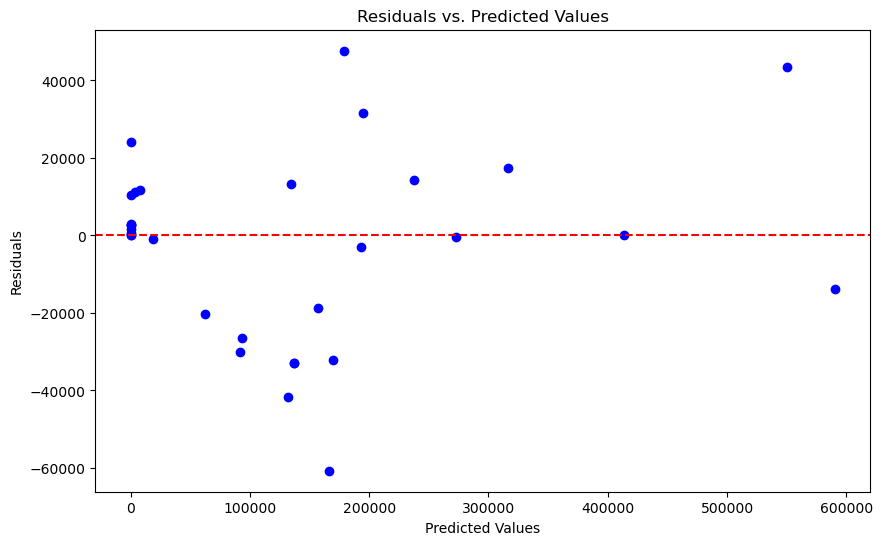

Breusch-Pagan Test
LM Statistic: 1.5346658485128004, p-value: 0.21541353254339335


In [24]:
df_values['residuals'] = actual_values - predicted_values 
df_values['predicted'] = predicted_values
# Compute the variance of residuals
variance_residuals = np.var(df_values['residuals'], ddof=1)  # ddof=1 for sample variance

print("Variance of Residuals:", variance_residuals)

# Plot Residuals vs. Predicted Values to check for homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, df_values['residuals'], color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Optional: Breusch-Pagan test for homoscedasticity
# Adding a constant to the model
X = sm.add_constant(df_values['predicted'])
results = sm.OLS(df_values['residuals'], X).fit()
test_results = sm.stats.diagnostic.het_breuschpagan(results.resid, X)

print("Breusch-Pagan Test")
print(f"LM Statistic: {test_results[0]}, p-value: {test_results[1]}")

D:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


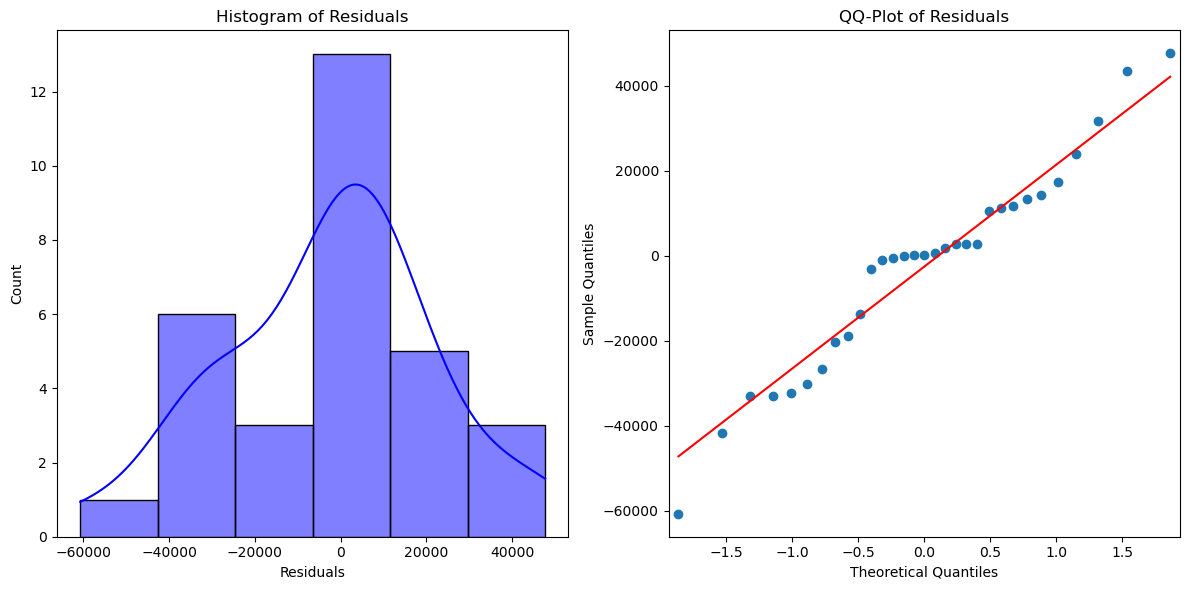

Shapiro-Wilk Test
Statistic: 0.9674594402313232, p-value: 0.4519977569580078
Skewness: -0.19388472840475618, Kurtosis: 0.18792369180645396
Jarque-Bera Test
Statistic: 0.1766875349089357, p-value: 0.9154461220421407


In [25]:
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import jarque_bera

# 1. Histogram and QQ-Plot for residuals
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_values['residuals'], kde=True, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')

# QQ-Plot
plt.subplot(1, 2, 2)
qqplot(df_values['residuals'], line='s', ax=plt.gca())
plt.title('QQ-Plot of Residuals')

plt.tight_layout()
plt.show()

# 2. Shapiro-Wilk Test
shapiro_test = stats.shapiro(df_values['residuals'])
print("Shapiro-Wilk Test")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 3. Skewness and Kurtosis
skewness = df_values['residuals'].skew()
kurtosis = df_values['residuals'].kurtosis()
print(f'Skewness: {skewness}, Kurtosis: {kurtosis}')

# 4. Jarque-Bera Test
jb_test = jarque_bera(df_values['residuals'])
print("Jarque-Bera Test")
print(f"Statistic: {jb_test[0]}, p-value: {jb_test[1]}")

In [26]:
model = sm.OLS(actual_values, train_features).fit()
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['ViF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return vif_data

vif_df1 = calculate_vif(features)
print(vif_df1)

                  Variable         ViF
0       Irrigated by Wells    8.229201
1   Irrigated by TubeWells   22.651040
2           LiftIrrigation    8.663005
3             Area (Maize)   54.591892
4           Tractors Count   34.475672
5               Total Loan   52.338412
6                Total NPK   51.060929
7             Sowing Seeds   34.542867
8      Medium Landholdings  108.177030
9        Institutions Area   17.553999
10      Small Landholdings   79.325589


The main issue with the dataset is this: Every district in Karnataka has a very different variety of features that directly effect the production of either rice or maize, and we could claim, that every district has a 'model' of its own, which gives a particular value of production, and hence if we have to implement a model for the whole state, we have to approximate the values given by these models( corresponding to each district ) as a single model. This would be helpful if the data was temporal for each district, since the change in features for each district would not vary rapidly, but linearly, and the production would vary in a similar manner. But modelling in geopolitical division may or may not give a linear relation

**The 11 parameters data was obtained using new four parameters taken from the original dataset, called Sowing Seeds, Medium Landholdings, Small Landholdings**

**Addition of more columns to get more possible parameters so as to get clarity on parameters to be used for modeling**

In [27]:
df_new_data = pd.read_excel('Agriculture_KAG_2016_17.xlsx')

In [28]:
df_new_data['Total_Production'] = df_new_data['TotalCerealsandMinorMillets_Production_230'] + df_new_data['TotalOilSeeds_Production_249'] + df_new_data['TotalFoodGrains_240'] + df_new_data['TotalGourdVarietyVegetables_276']
df_new_data['Ratio'] = df_new_data['Maize_Production_226']/df_new_data['Total_Production']

In [29]:
df_values['Sowing Seeds'] = df_new_data['SowingSeedsDistributed_Maize_320'] * df_new_data['Ratio']

In [30]:
df_values['Medium Landholdings'] = df_new_data['SemiMediumAgricultureLandHoldings_TotalArea_1077'] * df_new_data['Ratio']

In [31]:
df_values['Small Landholdings'] = df_new_data['SmallAgricultureLandHoldings_TotalArea_1045'] * df_new_data['Ratio']

In [32]:
df_values['Institutions Area'] = df_new_data['MediumAgricultureLandHoldings_TotalInstitutionsArea_1108'] * df_new_data['Ratio']

In [33]:
df_values.loc[30, 'Sowing Seeds'] = df_values.loc[24, 'Sowing Seeds'] / 2
df_values.loc[30, 'Medium Landholdings'] = df_values.loc[24, 'Medium Landholdings'] / 2
df_values.loc[30, 'Small Landholdings'] = df_values.loc[24, 'Small Landholdings'] / 2
df_values.loc[30, 'Institutions Area'] = df_values.loc[24, 'Institutions Area'] / 2

In [34]:
df_values.loc[24, 'Sowing Seeds'] = df_values.loc[24, 'Sowing Seeds'] / 2
df_values.loc[24, 'Medium Landholdings'] = df_values.loc[24, 'Medium Landholdings'] / 2
df_values.loc[24, 'Small Landholdings'] = df_values.loc[24, 'Small Landholdings'] / 2
df_values.loc[24, 'Institutions Area'] = df_values.loc[24, 'Institutions Area'] / 2

In [35]:
df_values = df_values.drop('residuals', axis=1).drop('predicted', axis=1 )

**This data is saved in the file New Parameter.csv**

In [36]:
df_values.to_csv('New Parameters.csv')

In [36]:
df_values

,Irrigated by Wells,Irrigated by TubeWells,LiftIrrigation,Area (Maize),Tractors Count,Total Loan,Total NPK,Maize_Production,Sowing Seeds,Medium Landholdings,Institutions Area,Small Landholdings
0,0.000000,175.723235,0.000000,1129.0,275.164389,98.025105,438.180210,2879,0.083651,353.645829,2.124168,375.019098
1,116.814760,3197.193185,0.157645,14867.0,154.649500,3429.301433,3036.080250,42583,21.239477,5431.492233,0.788224,6715.824015
2,0.000000,709.859804,0.118964,1987.0,339.256359,928.035816,222.225258,10450,7.737139,1262.508325,1.189643,1674.213925
3,0.000000,28105.507253,32.509127,92194.0,5647.169517,37647.333954,10902.406571,271975,1520.333365,48239.898165,135.809156,38764.247286
4,221.834115,20213.730878,402.912659,173400.0,8341.220655,27344.833540,25702.835480,593544,1579.820021,31387.979533,262.073791,30215.096139
5,0.000000,200.386108,0.000000,640.0,167.701482,772.943145,220.782906,1759,0.512407,573.090339,1.034764,676.318038
6,0.000000,14559.991862,6.070277,59377.0,3298.472645,17213.260595,8196.896749,105491,1022.740425,15565.345280,78.913595,18158.509604
7,1178.978184,5958.813645,764.862097,43827.0,3305.007438,18792.926996,10428.246256,226532,702.600996,11842.467431,38.685222,14137.237938
8,64.863914,10417.677296,0.647919,24207.0,1910.209867,10614.829758,2746.313635,66868,118.054483,13853.376989,9.934761,11514.244594
9,20.792453,3145.789961,489.764426,25831.0,1908.819293,9537.739741,8156.290370,61353,351.403272,8556.995792,88.097503,9268.265945
